In [2]:
# import kagglehub
#
# # Download latest version
# path = kagglehub.dataset_download("uciml/german-credit")
#
# print("Path to dataset files:", path)

100%|██████████| 10.9k/10.9k [00:00<00:00, 3.50MB/s]

Extracting files...
Path to dataset files: C:\Users\debas\.cache\kagglehub\datasets\uciml\german-credit\versions\1


In [1]:
#Importing necessary library and loading the dataset
import pandas as pd

df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


## Checking the unique values in each columns for better preprocessing

In [3]:
print(df['Unnamed: 0'].value_counts().unique())

[1]


In [4]:
print(df['Sex'].unique())

['male' 'female']


In [5]:
print(df['Job'].unique())

[2 1 3 0]


In [6]:
print(df['Housing'].unique())

['own' 'free' 'rent']


In [7]:
print(df['Saving accounts'].unique())

[nan 'little' 'quite rich' 'rich' 'moderate']


In [8]:
print(df['Checking account'].unique())

['little' 'moderate' nan 'rich']


In [9]:
print(df['Purpose'].unique())

['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


In [10]:
print(df[ 'Risk'].unique())

['good' 'bad']


In [11]:
#Checking for null values in the columns
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
#Dropping unnamed 0 col for better accuracy
df = df.drop(columns=['Unnamed: 0'],axis=1)



In [13]:
#Replacing NA values with Unknown for better performance

df['Saving accounts']= df['Saving accounts'].fillna('Unknown')
df['Checking account']= df['Checking account'].fillna('Unknown')

In [14]:
print(df['Saving accounts'].unique())

['Unknown' 'little' 'quite rich' 'rich' 'moderate']


In [15]:
print(df['Checking account'].unique())

['little' 'moderate' 'Unknown' 'rich']


In [16]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [17]:
df.columns.tolist()

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [18]:
#Specifying separate categorical columns
categorical_col = ['Job','Housing','Saving accounts','Checking account','Purpose']
bin_col = ['Sex']
numerical_col = ['Age','Job','Credit amount','Duration']


In [19]:
#Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_col),
        ('bin',OrdinalEncoder(),bin_col),
        ('num',StandardScaler(),numerical_col),
    ],
    remainder='drop'
)
preprocessor

,transformers,"[('cat', ...), ('bin', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [20]:
#Splitting dataset based on predictor and target variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [21]:
X.columns.tolist()

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

In [22]:
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: Risk, Length: 1000, dtype: object

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (700, 9)
X_test shape: (300, 9)
y_train shape: (700,)
y_test shape: (300,)


In [24]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
print(X_train_transformed.shape)
print(X_test_transformed.shape)

(700, 29)
(300, 29)


In [25]:
y.value_counts(normalize=True)

Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

In [54]:
#Model Initialization
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(class_weight='balanced',max_iter=1000)
dt = DecisionTreeClassifier(criterion = "entropy",random_state = 42,class_weight = 'balanced')
rf = RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=42)


In [55]:
#Fitting models
lr.fit(X_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [56]:
dt.fit(X_train_transformed, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [57]:
rf.fit(X_train_transformed, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
#Predicting models

y_pred_lr = lr.predict(X_test_transformed)
y_pred_dt = dt.predict(X_test_transformed)
y_pred_rf = rf.predict(X_test_transformed)

In [59]:
#Predictions for roc-auc scores
y_pred_prob_lr = lr.predict_proba(X_test_transformed)
y_pred_prob_dt = dt.predict_proba(X_test_transformed)
y_pred_prob_rf = rf.predict_proba(X_test_transformed)

In [60]:
#Defining evaluation metrics for each model
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score,classification_report


def evaluate_score(name,y_true,y_pred,y_pred_prob):
    print(f"{name} Evaluation...")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.3f}")
    print(f"F1-score: {f1_score(y_true, y_pred,pos_label='good'):.3f}")
    print(f"Recall: {recall_score(y_true, y_pred, pos_label='good'):.3f}")
    print(f"Precision: {precision_score(y_true, y_pred, pos_label='good'):.3f}")
    try:
        roc_auc = roc_auc_score((y_true=='good').astype(int), y_pred_prob[:,1])
        print(f"ROC AUC: {roc_auc:.3f}")
    except ValueError as e:
        print("ROC AUC can't be calculated ", e)

    print("\n Classification Report:",classification_report(y_true, y_pred,zero_division=0))



In [61]:
evaluate_score('Logistic Regression',y_test,y_pred_lr,y_pred_prob_lr)

Logistic Regression Evaluation...
Accuracy: 0.687
F1-score: 0.760
Recall: 0.713
Precision: 0.814
ROC AUC: 0.751

 Classification Report:               precision    recall  f1-score   support

         bad       0.49      0.63      0.55        91
        good       0.81      0.71      0.76       209

    accuracy                           0.69       300
   macro avg       0.65      0.67      0.65       300
weighted avg       0.72      0.69      0.70       300



In [62]:
evaluate_score('Decision Tree Classifier',y_test,y_pred_dt,y_pred_prob_dt)

Decision Tree Classifier Evaluation...
Accuracy: 0.693
F1-score: 0.785
Recall: 0.804
Precision: 0.767
ROC AUC: 0.622

 Classification Report:               precision    recall  f1-score   support

         bad       0.49      0.44      0.47        91
        good       0.77      0.80      0.79       209

    accuracy                           0.69       300
   macro avg       0.63      0.62      0.63       300
weighted avg       0.68      0.69      0.69       300



In [63]:
evaluate_score('Random Forest Classifier',y_test,y_pred_rf,y_pred_prob_rf)

Random Forest Classifier Evaluation...
Accuracy: 0.733
F1-score: 0.825
Recall: 0.904
Precision: 0.759
ROC AUC: 0.747

 Classification Report:               precision    recall  f1-score   support

         bad       0.61      0.34      0.44        91
        good       0.76      0.90      0.83       209

    accuracy                           0.73       300
   macro avg       0.68      0.62      0.63       300
weighted avg       0.71      0.73      0.71       300



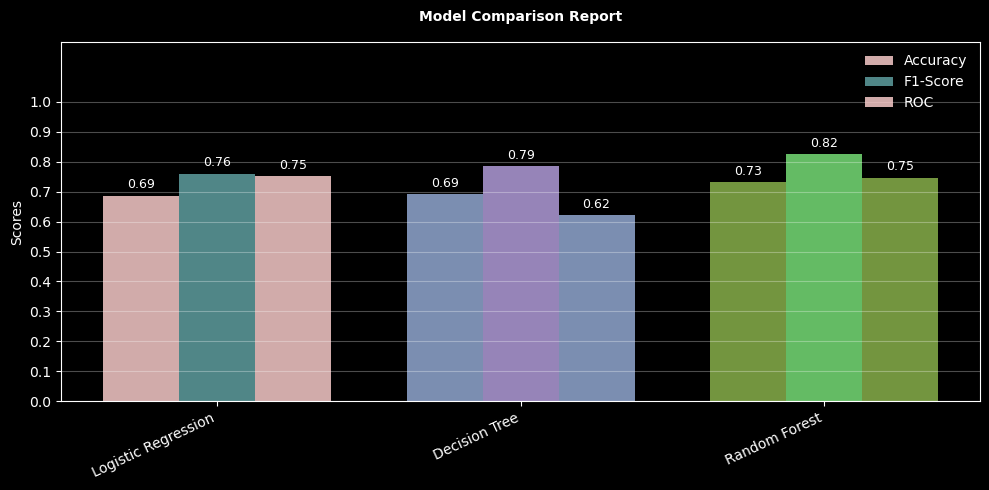

In [69]:
#PLotting model performance plot
import matplotlib.pyplot as plt
import numpy as np

colors_acc = {
    'Logistic Regression':'#F7CAC9',
    'Decision Tree':'#92A8D1',
    'Random Forest':'#88B04B'
}

colors_f1 = {
    'Logistic Regression':'#5F9EA0',
    'Decision Tree':'#B19CD9',
    'Random Forest':'#77DD77'
}

colors_roc ={
    'Logistic Regression':'#F7CAC9',
    'Decision Tree':'#92A8D1',
    'Random Forest':'#88B04B'
}

models =['Logistic Regression','Decision Tree','Random Forest']
accuracy = [0.687,0.693,0.733]
f1_score = [0.760,0.785,0.825]
roc  = [0.751,0.622,0.747]
x = np.arange(len(models))

bar_width =0.25
plt.style.use('dark_background')
fig,ax = plt.subplots(figsize=(10,5))

bar_acc = ax.bar(
    x-bar_width,
    accuracy,
    width=bar_width,
    label='Accuracy',
    color=[colors_acc[m] for m in models],alpha =0.85
)

bar_f1 = ax.bar(
    x,
    f1_score,
    width=bar_width,
    label='F1-Score',
    color = [colors_f1[m] for m in models],alpha =0.85
)

bar_roc = ax.bar(
    x+bar_width,
    roc,
    width=bar_width,
    label='ROC',
    color = [colors_roc[m] for m in models],alpha =0.85
)

#Adding values to labels
ax.bar_label(bar_acc, labels=[f"{v:.2f}" for v in accuracy], padding=3, fontsize=9)
ax.bar_label(bar_f1, labels=[f"{v:.2f}" for v in f1_score], padding=3, fontsize=9)
ax.bar_label(bar_roc,labels=[f"{v:.2f}" for v in roc], padding=3, fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(models,rotation=25,ha='right',fontsize=10)
ax.set_ylabel('Scores',fontsize=10)
ax.set_ylim([0.00,1.2])
ax.set_yticks(np.arange(0,1.1,0.1))
ax.yaxis.grid(True,linestyle='-',alpha=0.3)
ax.set_title('Model Comparison Report',fontsize=10,fontweight='bold',pad=15)
ax.legend(frameon=False,fontsize=10,loc='upper right')
plt.tight_layout()
plt.show()





In [70]:
#Sample testing with the best model: Random forest classifier

credit_wothy = y_test[y_test=='good'].index[:5]
credit_samples = X_test.loc[credit_wothy]

#Transform and predict
credit_worthy = preprocessor.transform(credit_samples)
credit_predict = rf.predict(credit_worthy)

credit_prob = rf.predict_proba(credit_worthy)[:,1]
for i in range(len(credit_samples)):
    print(f"Transaction{i+1}: Actual='good', Predicted={credit_predict[i]} (Credit Worthiness Probability: {credit_prob[i]:.3f})")


Transaction1: Actual='good', Predicted=good (Credit Worthiness Probability: 0.570)
Transaction2: Actual='good', Predicted=good (Credit Worthiness Probability: 0.624)
Transaction3: Actual='good', Predicted=good (Credit Worthiness Probability: 0.642)
Transaction4: Actual='good', Predicted=good (Credit Worthiness Probability: 0.900)
Transaction5: Actual='good', Predicted=good (Credit Worthiness Probability: 0.552)


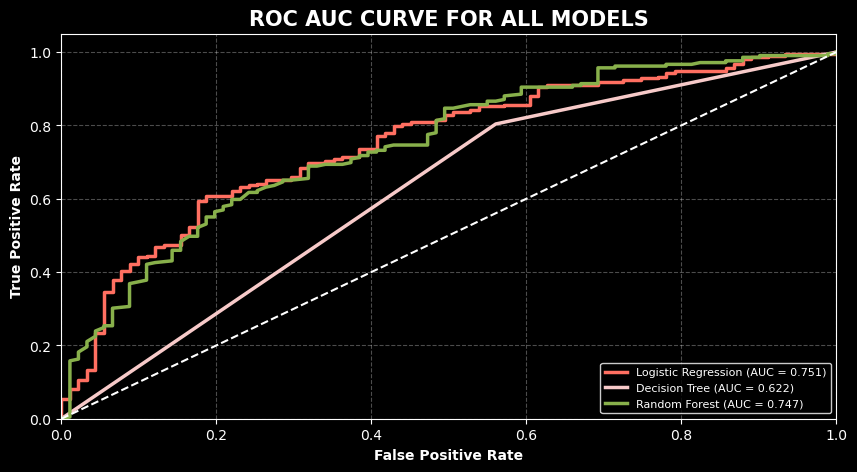

In [71]:
# ROC AUC CURVE for each model

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define your trained models
models_stratified = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf
}

# Custom colors for each model
colors = {
    'Logistic Regression': '#FF6F61',
    'Decision Tree': '#F7CAC9',
    'Random Forest': '#88B04B'
}

plt.style.use('dark_background')
plt.figure(figsize=(10,5))

#Converting y_test from 'good'/'bad' to numeric (needed for roc_curve)
y_test_numeric = (y_test == 'good').astype(int)

for name, model in models_stratified.items():
    # Get prediction scores (probabilities or decision function)
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_transformed)[:, 1]
    else:
        y_score = model.decision_function(X_test_transformed)


    fpr, tpr, _ = roc_curve(y_test_numeric, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot each ROC curve
    plt.plot(
        fpr, tpr,
        color=colors[name],
        lw=2.5,
        label=f"{name} (AUC = {roc_auc:.3f})"
    )


plt.plot([0, 1], [0, 1], 'w--', lw=1.5)

# Formatting the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=10, fontweight='bold')
plt.title("ROC AUC CURVE FOR ALL MODELS", fontsize=15, fontweight='bold')
plt.legend(fontsize=8, loc='lower right', frameon=True,
           facecolor='black', edgecolor='white')
plt.grid(alpha=0.3, linestyle='--')

plt.show()


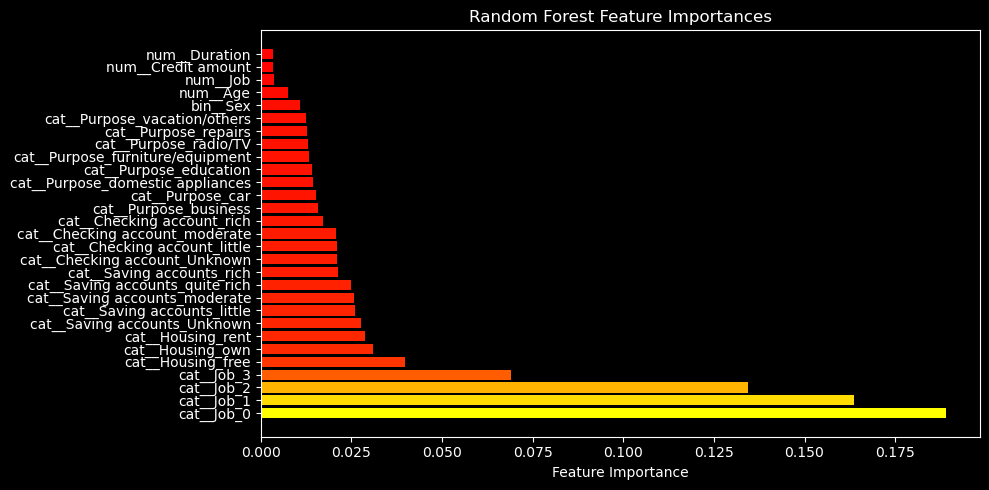

In [72]:
#Feature Importance
importances = rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,5))
plt.barh(np.array(feature_names), importances[sorted_idx],color=plt.cm.autumn(importances[sorted_idx]/max(importances)))
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


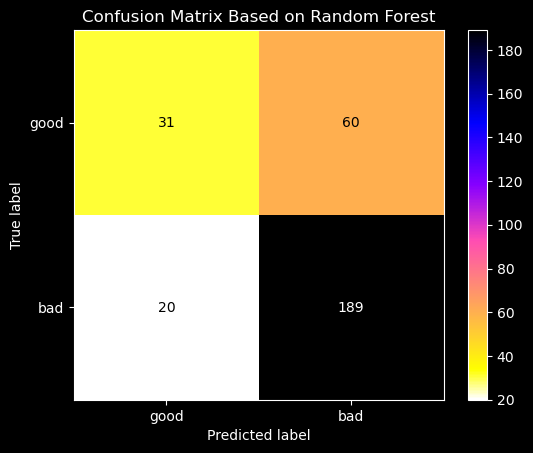

In [73]:
#Confusion Matrix for the best model RF
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['good','bad'])
disp.plot(cmap='gnuplot2_r')
plt.title('Confusion Matrix Based on Random Forest')
plt.show()
